## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold


from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

## Lasso regularization for feature selection

In [ ]:
# Load the dataset
file_path = 'cleaned_airline_data.csv'
df = pd.read_csv(file_path)

In [ ]:
# Segregating the Feature and Target
X = df.drop("fare", axis=1).values
y = df["fare"].values

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
names=df.drop("fare", axis=1).columns

# Initializing the Model
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+07, tolerance: 7.276e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso1_coef

array([1.69689744e-01, 3.08765548e-01, 4.82031641e-05, 3.72652095e-04,
       2.23262386e-02, 2.33669871e-02, 1.25078228e-04, 1.93993494e-04,
       9.36434740e-03, 1.03839821e-02, 5.27748246e-03, 1.13240257e-02,
       3.51701530e-03, 3.30061824e+00, 6.53234008e-01, 1.33599240e-02,
       7.81794187e+00, 2.89575537e-01, 1.02884622e-02, 1.22641103e-02])

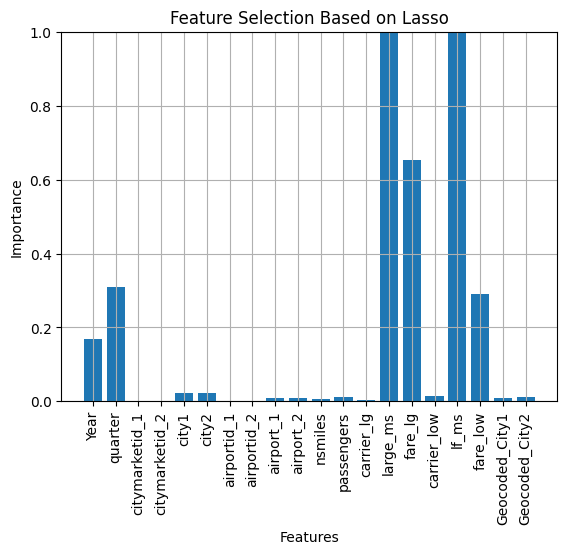

In [ ]:
# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 1)
plt.show()

In [ ]:
# parameters to be tested on GridSearchCV
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.498e+07, tolerance: 7.276e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.501e+07, tolerance: 7.308e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.496e+07, tolerance: 7.289e

Best Params {'alpha': 1e-05}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.124e+07, tolerance: 9.102e+04
  model = cd_fast.enet_coordinate_descent(


## Bidirectional selection for feature selection


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# Sequential Bidirectional Selection(sfs)
clf = LinearRegression()
sfs = SFS(clf,
          k_features=(3,8),  # Number of features to select, or "best" for optimal set
          forward=True,       # Start with forward selection
          floating=True,      # Enables bidirectional feature selection
          scoring='r2',       # Metric to evaluate feature subsets
          cv=2)               # Number of cross-validation folds

In [ ]:
sfs.fit(X_train, y_train)


SequentialFeatureSelector(cv=2, estimator=LinearRegression(), floating=True,
                          k_features=(3, 8), scoring='r2')

In [ ]:
sfs.k_features

(3, 8)

In [ ]:
sfs.k_feature_names_

('0', '3', '10', '11', '13', '14', '16', '17')

In [ ]:
# Get selected feature indices and map them to column names
X = pd.DataFrame(X, columns=names)
selected_feature_indices = sfs.k_feature_idx_
selected_feature_names = X.columns[list(selected_feature_indices)]
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['Year', 'citymarketid_2', 'nsmiles', 'passengers', 'large_ms',
       'fare_lg', 'lf_ms', 'fare_low'],
      dtype='object')


## Forward selection for feature selection


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# Sequential Forward Selection(sfs)
clf = LinearRegression()
sfs = SFS(clf,
          k_features=(3,8),  # Number of features to select, or "best" for optimal set
          forward=True,       # Start with forward selection
          floating=False,
          scoring='r2',       # Metric to evaluate feature subsets
          cv=2)               # Number of cross-validation folds

In [ ]:
sfs.fit(X_train, y_train)

SequentialFeatureSelector(cv=2, estimator=LinearRegression(), k_features=(3, 8),
                          scoring='r2')

In [ ]:
# Get selected feature indices and map them to column names
X = pd.DataFrame(X, columns=names)
selected_feature_indices = sfs.k_feature_idx_
selected_feature_names = X.columns[list(selected_feature_indices)]
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['Year', 'citymarketid_2', 'nsmiles', 'passengers', 'large_ms',
       'fare_lg', 'lf_ms', 'fare_low'],
      dtype='object')


## Correlation for feature selection

In [ ]:
corr_matrix = df.corr()

<Axes: >

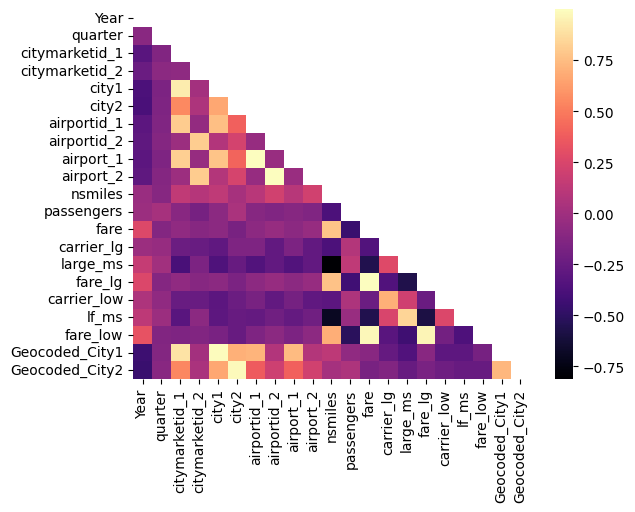

In [ ]:
plt.show(10,6)
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(data=corr_matrix.corr(), cmap = "magma", mask=mask)

In [ ]:
corr_with_target = corr_matrix["fare"]
corr_with_target

,fare
Year,0.210451
quarter,-0.016725
citymarketid_1,0.046274
citymarketid_2,-0.001943
city1,0.066562
city2,0.023898
airportid_1,0.046556
airportid_2,0.053878
airport_1,0.048797
airport_2,0.055816


In [ ]:
k = 10
top_k = corr_with_target.abs().sort_values(ascending=False)[:k].index
selected_features = df[top_k]
selected_features

,fare,fare_lg,fare_low,nsmiles,lf_ms,large_ms,Year,passengers,carrier_lg,city1
0,81.43,81.43,81.43,970,1.0000,1.0000,2021,180,16,2
1,208.93,219.98,154.11,970,0.1193,0.4659,2021,19,11,2
2,184.56,184.44,184.44,580,0.9968,0.9968,2021,204,57,1
3,182.64,183.09,183.09,580,0.9774,0.9774,2021,264,4,1
4,177.11,184.49,165.77,328,0.3939,0.6061,2021,398,57,1
...,...,...,...,...,...,...,...,...,...,...
211857,240.06,233.10,230.98,549,0.0151,0.8864,2024,167,4,126
211858,229.11,228.01,224.90,549,0.0102,0.9607,2024,151,51,126
211859,214.99,224.07,84.86,880,0.0863,0.8763,2024,488,57,125
211860,220.34,223.78,154.41,880,0.0832,0.8341,2024,197,4,125


In [ ]:
top_k

Index(['fare', 'fare_lg', 'fare_low', 'nsmiles', 'lf_ms', 'large_ms', 'Year',
       'passengers', 'carrier_lg', 'city1'],
      dtype='object')

In [ ]:
selected_corr_matrix = selected_features.corr()
selected_corr_matrix

,fare,fare_lg,fare_low,nsmiles,lf_ms,large_ms,Year,passengers,carrier_lg,city1
fare,1.000000,0.950714,0.857041,0.507066,-0.267592,-0.249612,0.210451,-0.197778,-0.090708,0.066562
fare_lg,0.950714,1.000000,0.810631,0.471706,-0.315276,-0.233074,0.193216,-0.153413,-0.099169,0.062249
fare_low,0.857041,0.810631,1.000000,0.416236,0.009833,-0.137015,0.239127,-0.222286,-0.059112,0.053923
nsmiles,0.507066,0.471706,0.416236,1.000000,-0.260558,-0.423742,0.019874,-0.111482,-0.064142,0.161587
lf_ms,-0.267592,-0.315276,0.009833,-0.260558,1.000000,0.533198,0.123239,-0.100131,0.089099,-0.037722
large_ms,-0.249612,-0.233074,-0.137015,-0.423742,0.533198,1.000000,0.123913,0.025896,0.110755,-0.091287
Year,0.210451,0.193216,0.239127,0.019874,0.123239,0.123913,1.000000,0.069363,0.042904,-0.001722
passengers,-0.197778,-0.153413,-0.222286,-0.111482,-0.100131,0.025896,0.069363,1.000000,0.019481,-0.006535
carrier_lg,-0.090708,-0.099169,-0.059112,-0.064142,0.089099,0.110755,0.042904,0.019481,1.000000,-0.041166
city1,0.066562,0.062249,0.053923,0.161587,-0.037722,-0.091287,-0.001722,-0.006535,-0.041166,1.000000


## Selected features
['Year', 'citymarketid_2', 'nsmiles', 'passengers', 'large_ms',
       'fare_lg', 'lf_ms', 'fare_low']